# Mod 9 CS I

In [1]:
#pip install seaborn

In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
#Loading the dataset
data = pd.read_csv("voice-classification.csv", header=0)
data.shape

(3168, 21)

In [4]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [6]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [7]:
#Feature Variable
X = data.drop(["label"], axis=1)
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [8]:
#Target Variable
y = data.label
y.head()

0    male
1    male
2    male
3    male
4    male
Name: label, dtype: object

<AxesSubplot:>

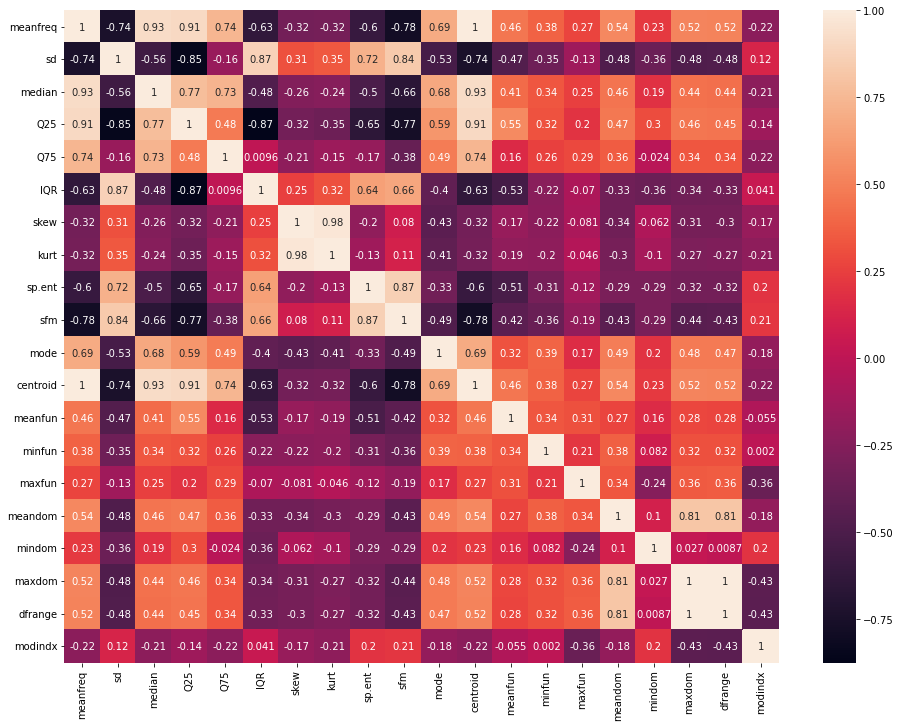

In [9]:
#Visualizing for Multicollinearity
corr = data.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True)

In [10]:
#Keeing the strong correlated columns (Above 90%)
"""
"meanfreq" -> "centroid", "median", "Q25"
"Q25" -> "centroid"
"median" -> "centroid"
"skew" -> "kurt"
"dfrange" -> "maxdom"
"""

#Removing Multicollinearity
X_new = X.drop(["centroid", "median", "Q25", "skew", "dfrange"], axis=1)
X_new.head()

,meanfreq,sd,Q75,IQR,kurt,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,modindx
0,0.059781,0.064241,0.090193,0.075122,274.402906,0.893369,0.491918,0.000000,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000
1,0.066009,0.067310,0.092666,0.073252,634.613855,0.892193,0.513724,0.000000,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.052632
2,0.077316,0.083829,0.131908,0.123207,1024.927705,0.846389,0.478905,0.000000,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.046512
3,0.151228,0.072111,0.207955,0.111374,4.177296,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.247119
4,0.135120,0.079146,0.206045,0.127325,4.333713,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,0.208274


In [11]:
# Encoding the target variable using OneHotEncoding

#One_Hot encoding is preferred over LabelEncoding as there is less number of categorical features and the categorical feature is not ordinal.
#https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False, drop='first') #Dropping the first column or the Dummy variable column
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([np.argmax(onehot_encoded[0, :])])
print(inverted)

[1 1 1 ... 0 0 0]
[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]
['female']


In [12]:
#Splitting the data in train-test with 20% of the data kept aside for testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, onehot_encoded, test_size=0.3, random_state=30)

In [13]:
#Fit a logistic regression model and measure the accuracy on the test set.  Note: Label Encoding is Required for Categorical variables
from sklearn.linear_model import LogisticRegression as logReg
log_reg = logReg().fit(X_train, y_train)

print(f"Coeff: {log_reg.coef_}")
print(f"Intercet: {log_reg.intercept_}")

#Predicting the data
y_pred = log_reg.predict(X_test)

import sklearn.metrics as metrics
print(f"The Mean Absolute Error for the testing data is : {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"The Mean Squared Error  for the testing data is : {metrics.mean_squared_error(y_test, y_pred)}")
print(f"The Root Mean Squared Error for the testing data is : {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

#Printing the Accuracy score of Case 1
score_Log_Reg = metrics.accuracy_score(y_pred, y_test)
print(f"Accuracy Score with the Logistic Regression is: {score_Log_Reg}")

#Printing the Confusion matrix for Logistic Regression
conf_log_reg = metrics.confusion_matrix(y_pred, y_test)
print(f"Confusion matrix with the Logistic Regression is: \n{conf_log_reg}")

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Coeff: [[-1.40819815e+00  1.72610415e+00  2.62812230e+00  1.02214292e+01
  -5.34924571e-04  4.50584108e+00  4.86090055e-01  1.42702016e+00
  -1.50463582e+01  5.24508150e-02 -2.23683291e+00  6.12960751e-02
  -3.02724807e+00 -5.60647603e-02 -1.30761530e+00]]
Intercet: [-2.42024057]
The Mean Absolute Error for the testing data is : 0.09674027339642481
The Mean Squared Error  for the testing data is : 0.09674027339642481
The Root Mean Squared Error for the testing data is : 0.3110309846244017
Accuracy Score with the Logistic Regression is: 0.9032597266035752
Confusion matrix with the Logistic Regression is: 
[[409  16]
 [ 76 450]]


In [14]:
#Splitting the data in train-test with 20% of the data kept aside for testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [15]:
#Fit a naive Bayes model and measure the accuracy on the test set. Note: No Label Encoding Required

from sklearn.naive_bayes import GaussianNB
clf_gaus = GaussianNB()
clf_gaus =clf_gaus.fit(X_train, y_train)

#Predicting the data
y_pred = clf_gaus.predict(X_test)

import sklearn.metrics as metrics
score_Naive_bayes = metrics.accuracy_score(y_pred, y_test)
print(f"The Accuracy score with the NB classifier is : {score_Naive_bayes}")

#Printing the Confusion matrix for the NB classifier
conf_nb = metrics.confusion_matrix(y_pred, y_test)
print(f"Confusion matrix with the NB classifier is: \n{conf_nb}")

The Accuracy score with the NB classifier is : 0.889589905362776
Confusion matrix with the NB classifier is: 
[[433  53]
 [ 52 413]]


In [16]:
#Fit a SVM model and measure the accuracy on the test set.  Note: No Label Encoding Required

from sklearn.svm import SVC
clf_svc = SVC()
clf_svc =clf_svc.fit(X_train, y_train)

#Predicting the data
y_pred = clf_svc.predict(X_test)

import sklearn.metrics as metrics
score_SVC = metrics.accuracy_score(y_test, y_pred)
print(f"The Accuracy score with the SVM classifier is : {score_SVC}")

#Printing the Confusion matrix for SVC
conf_SVC = metrics.confusion_matrix(y_pred, y_test)
print(f"Confusion matrix with the Logistic Regression is: \n{conf_SVC}")

The Accuracy score with the SVM classifier is : 0.6719242902208202
Confusion matrix with the Logistic Regression is: 
[[255  82]
 [230 384]]


In [17]:
#Comparing the accuracies with the different models:
print(f"The Accuracy score with the Log Reg classifier is : {score_Log_Reg}")
print(f"The Accuracy score with the Naive bayes classifier is : {score_Naive_bayes}")
print(f"The Accuracy score with the SVC classifier is : {score_SVC}")

The Accuracy score with the Log Reg classifier is : 0.9032597266035752
The Accuracy score with the Naive bayes classifier is : 0.889589905362776
The Accuracy score with the SVC classifier is : 0.6719242902208202


In [18]:
# The Logistic Regression model gives the highest accuracy but we need to encode the labels.
# SVM classifier gives the least accuracy.

In [19]:
#Printing the Confusion matrix for Logistic Regression
print(f"Confusion matrix with the Logistic Regression is: \n{conf_log_reg}")
print(f"Confusion matrix with the Naive bayes classifier is: \n{conf_nb}")
print(f"Confusion matrix with the SVC is: \n{conf_SVC}")

Confusion matrix with the Logistic Regression is: 
[[409  16]
 [ 76 450]]
Confusion matrix with the Naive bayes classifier is: 
[[433  53]
 [ 52 413]]
Confusion matrix with the SVC is: 
[[255  82]
 [230 384]]


In [20]:
# The Logistic Regression model gives the lowest Type2 Error. hence, this can be preferred than the other two for this case.